mounting to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparing dataset for training and testing
---

In [ ]:
# import all required tools
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import keras
from keras import models,layers
from keras.models import Sequential
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,AveragePooling2D,GlobalMaxPooling2D, BatchNormalization

In [ ]:
# reading the csv files as dataframes using pandas function read_csv with path of images
meta_df = pd.read_csv('/content/drive/MyDrive/NFT/Train/ISIC_2019_Training_Meta_data_with_path.csv')

In [ ]:
meta_df.head()

,Unnamed: 0,image,age_approx,anatom_site_general,lesion_id,sex,label,path
0,0,ISIC_0012653_downsampled,50.0,posterior torso,MSK4_0011169,female,1.0,/content/drive/MyDrive/NFT/Train/classified/NV...
1,1,ISIC_0012654_downsampled,30.0,lower extremity,MSK4_0011170,female,1.0,/content/drive/MyDrive/NFT/Train/classified/NV...
2,2,ISIC_0012655_downsampled,35.0,upper extremity,MSK4_0011171,female,1.0,/content/drive/MyDrive/NFT/Train/classified/NV...
3,3,ISIC_0012656_downsampled,45.0,posterior torso,MSK4_0011172,male,1.0,/content/drive/MyDrive/NFT/Train/classified/NV...
4,4,ISIC_0012657_downsampled,20.0,upper extremity,MSK4_0011173,female,1.0,/content/drive/MyDrive/NFT/Train/classified/NV...


In [ ]:
SIZE = 64 # for resizing image to 64 * 64

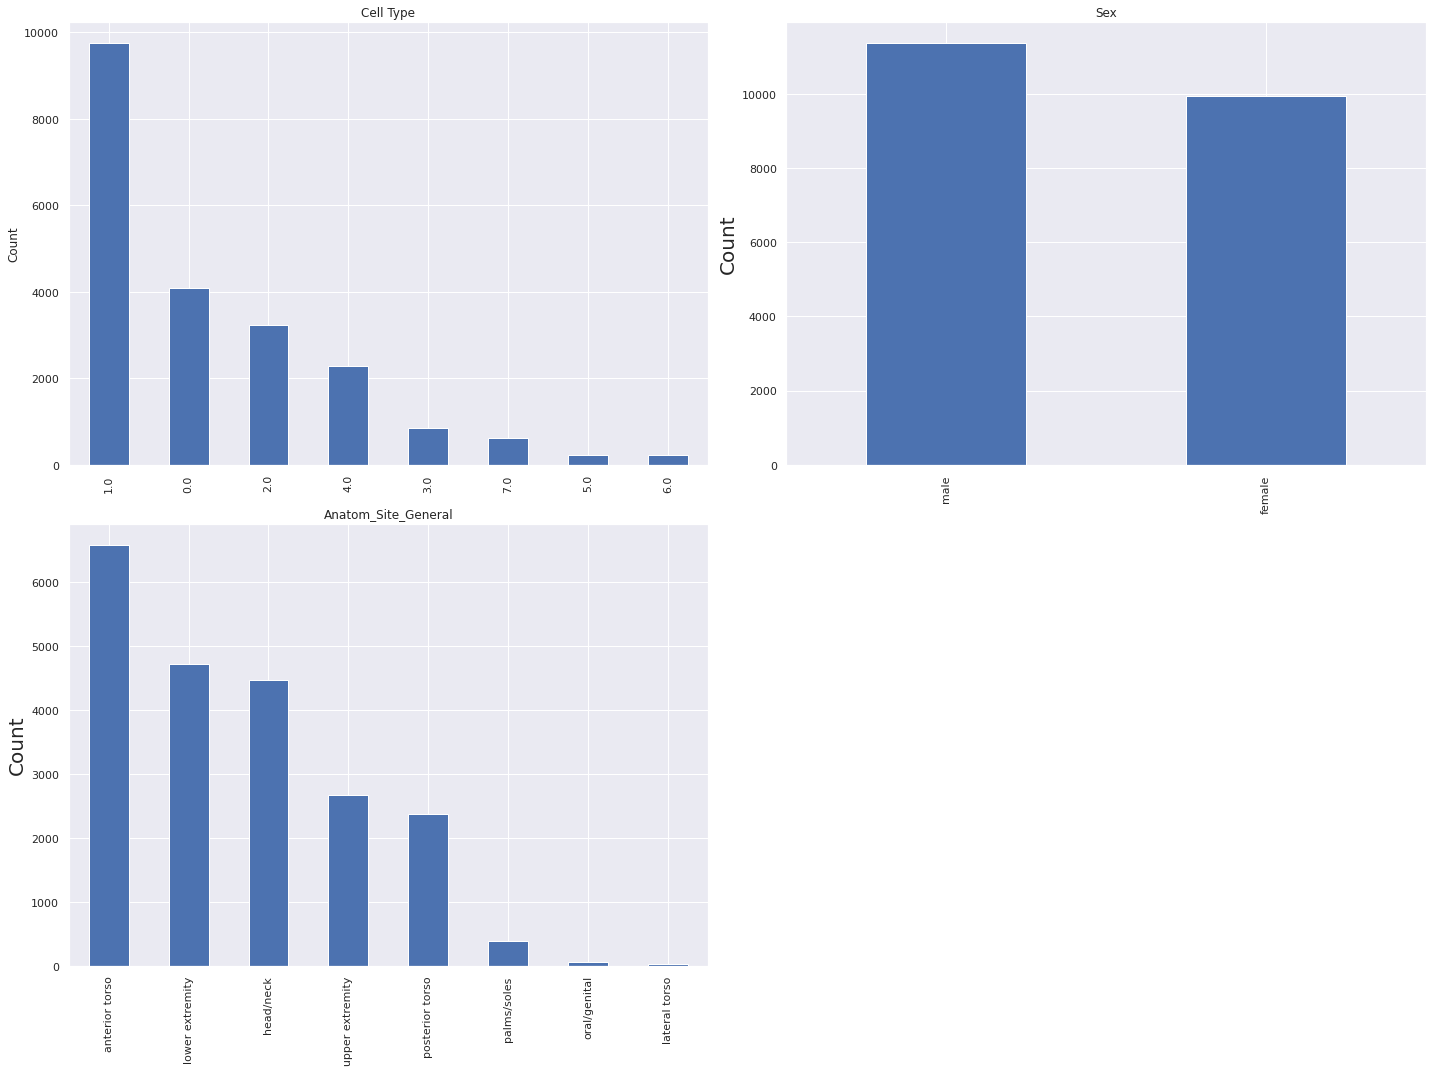

In [ ]:
# Data distribution visualization
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(221)
meta_df['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
meta_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=20)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
meta_df['anatom_site_general'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=20)
ax3.set_title('Anatom_Site_General')


plt.tight_layout()
plt.show()

In [ ]:
# balancing the dataframes 
df_0 = meta_df[meta_df['label'] == 0]
df_1 = meta_df[meta_df['label'] == 1]
df_2 = meta_df[meta_df['label'] == 2]
df_3 = meta_df[meta_df['label'] == 3]
df_4 = meta_df[meta_df['label'] == 4]
df_5 = meta_df[meta_df['label'] == 5]
df_6 = meta_df[meta_df['label'] == 6]
df_7 = meta_df[meta_df['label'] == 7]

In [ ]:
n_samples=400 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)
df_7_balanced = resample(df_7, replace=True, n_samples=n_samples, random_state=42)

#concatinating dataframes into a single dataframe
meta_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, 
                              df_6_balanced, df_7_balanced])

In [ ]:
meta_df_balanced.head()

,Unnamed: 0,image,age_approx,anatom_site_general,lesion_id,sex,label,path
7532,7532,ISIC_0032389,65.0,head/neck,HAM_0003102,male,0.0,/content/drive/MyDrive/NFT/Train/classified/ME...
19870,19870,ISIC_0070933,55.0,head/neck,BCN_0002152,male,0.0,/content/drive/MyDrive/NFT/Train/classified/ME...
16735,16735,ISIC_0065883,35.0,head/neck,BCN_0001321,male,0.0,/content/drive/MyDrive/NFT/Train/classified/ME...
3317,3317,ISIC_0027359,45.0,lower extremity,HAM_0000536,female,0.0,/content/drive/MyDrive/NFT/Train/classified/ME...
18340,18340,ISIC_0068460,70.0,anterior torso,BCN_0004234,male,0.0,/content/drive/MyDrive/NFT/Train/classified/ME...


In [ ]:
meta_df_balanced = meta_df_balanced.dropna()

In [ ]:
# maping image path to dataframe and creating new column takes some time
meta_df_balanced['image_arr'] = meta_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [ ]:
#Convert dataframe column of images into numpy array
X = np.asarray(meta_df_balanced['image_arr'].tolist())
X = X/255.  # Scale values to 0-1
Y=meta_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=8) #Convert to categorical as this is a multiclass classification problem

In [ ]:
#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=3)

In [ ]:
x_train.shape

(2400, 64, 64, 3)

# MODEL 1
---
**CNN**

In [ ]:

#Define the model.

num_classes = 8

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(8, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 128)       0

In [ ]:

# Train

batch_size = 16 
epochs = 30

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/30
150/150 - 7s - loss: 2.0867 - acc: 0.1496 - val_loss: 2.0691 - val_acc: 0.1475 - 7s/epoch - 48ms/step
Epoch 2/30
150/150 - 4s - loss: 2.0612 - acc: 0.1596 - val_loss: 2.0267 - val_acc: 0.1612 - 4s/epoch - 26ms/step
Epoch 3/30
150/150 - 4s - loss: 1.9661 - acc: 0.2033 - val_loss: 1.9570 - val_acc: 0.2013 - 4s/epoch - 27ms/step
Epoch 4/30
150/150 - 4s - loss: 1.8675 - acc: 0.2675 - val_loss: 1.9301 - val_acc: 0.2163 - 4s/epoch - 27ms/step
Epoch 5/30
150/150 - 4s - loss: 1.7918 - acc: 0.3146 - val_loss: 1.8429 - val_acc: 0.3038 - 4s/epoch - 27ms/step
Epoch 6/30
150/150 - 4s - loss: 1.7365 - acc: 0.3308 - val_loss: 1.7412 - val_acc: 0.3300 - 4s/epoch - 26ms/step
Epoch 7/30
150/150 - 4s - loss: 1.6904 - acc: 0.3537 - val_loss: 1.7855 - val_acc: 0.3088 - 4s/epoch - 26ms/step
Epoch 8/30
150/150 - 4s - loss: 1.6722 - acc: 0.3533 - val_loss: 1.7141 - val_acc: 0.3375 - 4s/epoch - 26ms/step
Epoch 9/30
150/150 - 4s - loss: 1.6114 - acc: 0.3988 - val_loss: 1.6483 - val_acc: 0.3625 - 4s/e

25/25 [==============================] - 1s 17ms/step - loss: 1.3916 - acc: 0.5025
Test accuracy: 0.5024999976158142


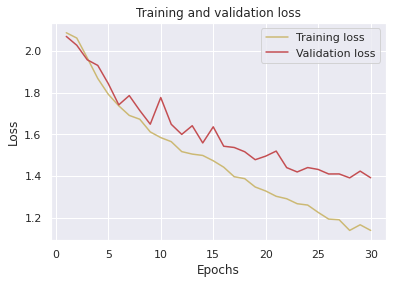

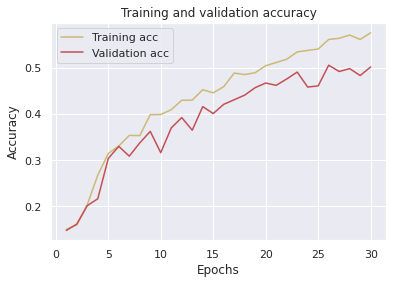

In [ ]:

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(30.5, 0.5, 'Fraction of incorrect predictions')

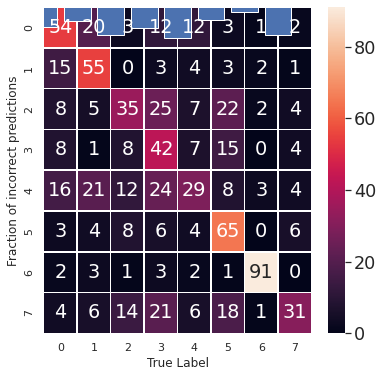

In [ ]:
# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(8), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/NFT/Train/Model_1','wb') as f:
  pickle.dump(model,f)

# MODEL 2
---
**VGG16**

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [64, 64]

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# useful for getting number of classes
folders = glob('/content/drive/MyDrive/NFT/Train/classified/*')

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model1 = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
batch_size = 16 
epochs = 30

history = model1.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/30
150/150 - 5s - loss: 1.8441 - accuracy: 0.3092 - val_loss: 1.7459 - val_accuracy: 0.3350 - 5s/epoch - 35ms/step
Epoch 2/30
150/150 - 4s - loss: 1.6385 - accuracy: 0.3979 - val_loss: 1.6301 - val_accuracy: 0.4038 - 4s/epoch - 28ms/step
Epoch 3/30
150/150 - 4s - loss: 1.5324 - accuracy: 0.4437 - val_loss: 1.5959 - val_accuracy: 0.4162 - 4s/epoch - 27ms/step
Epoch 4/30
150/150 - 4s - loss: 1.4508 - accuracy: 0.4867 - val_loss: 1.5280 - val_accuracy: 0.4200 - 4s/epoch - 27ms/step
Epoch 5/30
150/150 - 4s - loss: 1.3981 - accuracy: 0.5050 - val_loss: 1.5397 - val_accuracy: 0.4375 - 4s/epoch - 27ms/step
Epoch 6/30
150/150 - 4s - loss: 1.3571 - accuracy: 0.5225 - val_loss: 1.5103 - val_accuracy: 0.4475 - 4s/epoch - 27ms/step
Epoch 7/30
150/150 - 4s - loss: 1.3117 - accuracy: 0.5396 - val_loss: 1.4816 - val_accuracy: 0.4650 - 4s/epoch - 27ms/step
Epoch 8/30
150/150 - 4s - loss: 1.2740 - accuracy: 0.5517 - val_loss: 1.4910 - val_accuracy: 0.4450 - 4s/epoch - 29ms/step
Epoch 9/30
150/1

25/25 [==============================] - 2s 34ms/step - loss: 1.3925 - accuracy: 0.5163
Test accuracy: 0.5162500143051147


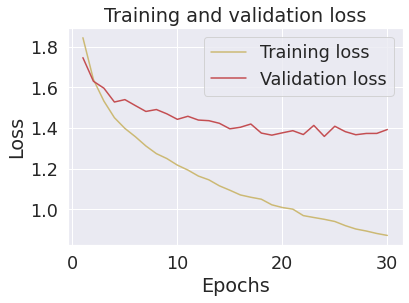

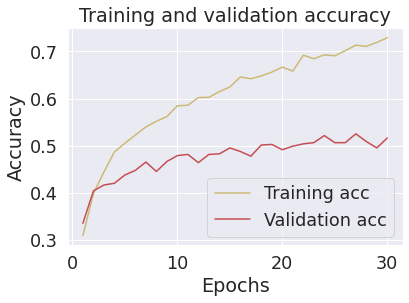

In [ ]:

score = model1.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(33.0, 0.5, 'Fraction of incorrect predictions')

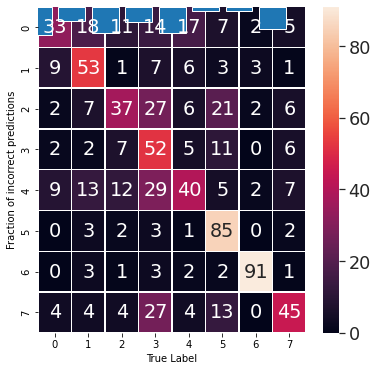

In [ ]:
# Prediction on test data
y_pred = model1.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(8), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
import pickle
with open('/content/drive/MyDrive/NFT/Train/Model_2','wb') as f:
  pickle.dump(model1,f)

INFO:tensorflow:Assets written to: ram://13933abd-bb23-44ce-9f8d-11358f2868c4/assets


# MODEL 3
---
**VGG19**

In [ ]:
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from glob import glob

# re-size all the images to this
IMAGE_SIZE = [64, 64]

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False,classifier_activation="softmax")

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = glob('/content/drive/MyDrive/NFT/Train/classified/*')

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model2 = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
batch_size = 16 
epochs = 30

history = model2.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/30
150/150 - 7s - loss: 1.8739 - accuracy: 0.2796 - val_loss: 1.7702 - val_accuracy: 0.3325 - 7s/epoch - 43ms/step
Epoch 2/30
150/150 - 5s - loss: 1.6374 - accuracy: 0.3921 - val_loss: 1.7319 - val_accuracy: 0.3512 - 5s/epoch - 35ms/step
Epoch 3/30
150/150 - 5s - loss: 1.5527 - accuracy: 0.4258 - val_loss: 1.6864 - val_accuracy: 0.3537 - 5s/epoch - 35ms/step
Epoch 4/30
150/150 - 5s - loss: 1.4810 - accuracy: 0.4658 - val_loss: 1.6646 - val_accuracy: 0.3525 - 5s/epoch - 35ms/step
Epoch 5/30
150/150 - 5s - loss: 1.4332 - accuracy: 0.4796 - val_loss: 1.5943 - val_accuracy: 0.3913 - 5s/epoch - 35ms/step
Epoch 6/30
150/150 - 5s - loss: 1.3848 - accuracy: 0.5038 - val_loss: 1.5706 - val_accuracy: 0.4175 - 5s/epoch - 35ms/step
Epoch 7/30
150/150 - 5s - loss: 1.3457 - accuracy: 0.5175 - val_loss: 1.5774 - val_accuracy: 0.3887 - 5s/epoch - 35ms/step
Epoch 8/30
150/150 - 6s - loss: 1.3155 - accuracy: 0.5321 - val_loss: 1.5511 - val_accuracy: 0.4225 - 6s/epoch - 43ms/step
Epoch 9/30
150/1

25/25 [==============================] - 1s 45ms/step - loss: 1.3649 - accuracy: 0.4913
Test accuracy: 0.49125000834465027


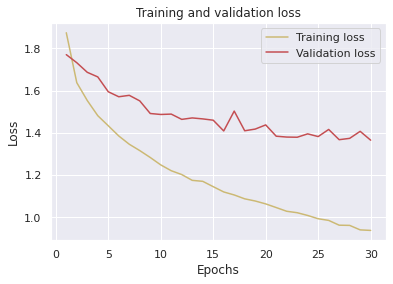

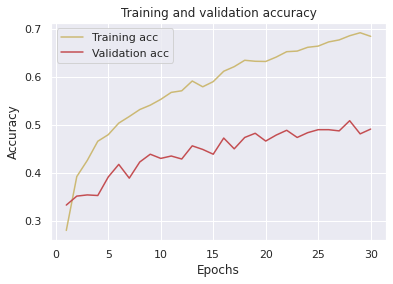

In [ ]:

score = model2.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(22.5, 0.5, 'Fraction of incorrect predictions')

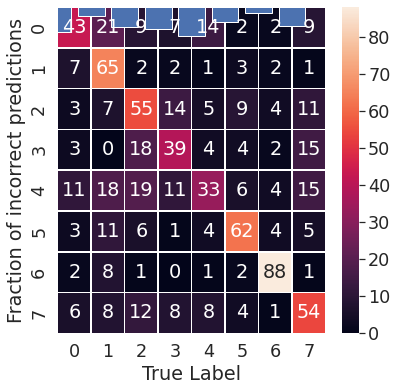

In [ ]:
# Prediction on test data
y_pred = model2.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(8), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
import pickle
with open('/content/drive/MyDrive/NFT/Train/Model_3','wb') as f:
  pickle.dump(model2,f)

INFO:tensorflow:Assets written to: ram://37e650f9-9dfa-4be7-a151-6bdb4afdf303/assets


# **ENSEMBLE**
---

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/NFT/Train/Model_1','rb') as f:
  model1 = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/NFT/Train/Model_2','rb') as f:
  model2 = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/NFT/Train/Model_3','rb') as f:
  model3 = pickle.load(f)

In [ ]:
models = [model1,model2,model3]

In [ ]:
preds = [model.predict(x_test) for model in models]

In [ ]:
preds = np.array(preds)

In [ ]:
summed = np.sum(preds, axis=0)

In [ ]:
ensemble_prediction = np.argmax(summed, axis=1)
y_test_ensemble = np.argmax(y_test , axis=1)

In [ ]:
prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)

In [ ]:
prediction1_ensemble = np.argmax(prediction1 , axis=1)
prediction2_ensemble = np.argmax(prediction2 , axis=1)
prediction3_ensemble = np.argmax(prediction3 , axis=1)

In [ ]:
accuracy1 = accuracy_score(y_test_ensemble,prediction1_ensemble)
accuracy2 = accuracy_score(y_test_ensemble,prediction2_ensemble)
accuracy3 = accuracy_score(y_test_ensemble,prediction3_ensemble)
ensemble_accuracy = accuracy_score(y_test_ensemble, ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

In [ ]:
#Weighted average ensemble
weights = [0.4, 0.2, 0.4]
#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(y_test_ensemble, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

In [ ]:
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds = np.tensordot(preds, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds, axis=1)
            weighted_accuracy = accuracy_score(y_test_ensemble, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obtained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])   

In [ ]:
df.head()

,wt1,wt2,wt3,acc
0,0.0,0.0,0.0,13.375
1,0.0,0.0,0.1,54.875
2,0.0,0.0,0.2,54.875
3,0.0,0.0,0.3,54.875
4,0.0,0.0,0.4,54.875


In [ ]:
#Weighted average ensemble max accuracy ideal
weights = [0.1, 0.0, 0.3]
#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(y_test_ensemble, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

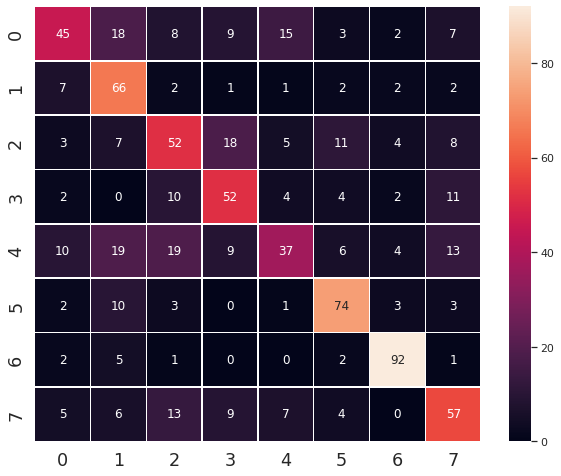

In [ ]:
#Print confusion matrix
cm = confusion_matrix(y_test_ensemble, weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)